# Version information

In [1]:
%matplotlib notebook
from PySide2.QtWidgets import *
from datetime import date
print("Running date:", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version:" + pyleecan.__version__)
import SciDataTool
print("SciDataTool version:" + SciDataTool.__version__)

Running date: May 20, 2022
Pyleecan version:1.4.0
SciDataTool version:2.4.0


# How to plot results

Pyleecan has generic built-in plot methods which allow to easily plot:

- **simulated** or **experimental** fields (unit conversions supported)

- **slices** (normalizations available)

- **Fourier Transforms**

but also to **compare** on the same graph a list of fields.

This flexibility is provided by the [SciDataTool module](https://github.com/Eomys/SciDataTool), which has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized.

This tutorial explains how to use Pyleecan's **plot commands**. It is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Plots.ipynb). For more details on the `SciDataTool` package, please refer to the specific tutorials:

- [How to create Data objects](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto1_Create.ipynb)

- [How to extract slices](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto2_Slices.ipynb)

- [How to plot data](https://nbviewer.jupyter.org/github/Eomys/SciDataTool/blob/master/Tutorials/tuto3_Plot.ipynb)

To demonstrate the capabilities and the use of the SciDataTool objects, two simulations are launched with FEMM: with imposed currents and in open-circuit. The simulations use periodicity and parallelization to reduce execution time.

In [2]:
# Import Pyleecan modules
from numpy import exp, sqrt, pi
from os.path import join
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.ForceMT import ForceMT
from pyleecan.Classes.Output import Output
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

# Load the machine
Toyota_Prius = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))

# Simulation initialization
simu = Simu1(name="FEMM_periodicity", machine=Toyota_Prius)

# Definition of the enforced output of the electrical module
simu.input = InputCurrent(
    Na_tot=252 * 8,
    Nt_tot=50 * 8,
)
# Set Id/Iq according to I0/Phi0
simu.input.OP = OPdq(N0=1000)
simu.input.OP.set_I0_Phi0(I0=250 / sqrt(2), Phi0=140*pi/180)

# Definition of the magnetic simulation: with periodicity
simu.mag = MagFEMM(is_periodicity_a=True, is_periodicity_t=True, nb_worker=4)
simu.force = ForceMT(is_periodicity_a=True, is_periodicity_t=True)

# Definition of the open-circuit simulation
simu2 = simu.copy()
simu2.input.OP.set_Id_Iq(Id=0,Iq=0)

# Run simulations
out = simu.run()
out2 = simu2.run()

[17:41:10] Starting running simulation FEMM_periodicity (machine=Toyota_Prius)
[17:41:10] Starting Magnetic module
[17:41:12] Solving time steps: 0%
[17:41:12] Solving time steps: 0%
[17:41:12] Solving time steps: 0%
[17:41:13] Solving time steps: 0%
[17:41:17] Solving time steps: 25%
[17:41:17] Solving time steps: 25%
[17:41:18] Solving time steps: 25%
[17:41:19] Solving time steps: 25%
[17:41:22] Solving time steps: 50%
[17:41:22] Solving time steps: 50%
[17:41:23] Solving time steps: 50%
[17:41:23] Solving time steps: 50%
[17:41:27] Solving time steps: 75%
[17:41:28] Solving time steps: 75%
[17:41:28] Solving time steps: 75%
[17:41:30] Solving time steps: 75%
[17:41:32] Solving time step: 100%
[17:41:32] Solving time step: 100%
[17:41:32] Solving time step: 100%
[17:41:34] Solving time step: 100%
[17:41:34] Starting Force module
[17:41:34] End of simulation FEMM_periodicity
[17:41:34] Starting running simulation FEMM_periodicity (machine=Toyota_Prius)
[17:41:34] Starting Magnetic mo

The following example demonstrates the syntax to **quickly plot** the torque and airgap flux obtained at the end of the simulation:

<IPython.core.display.Javascript object>


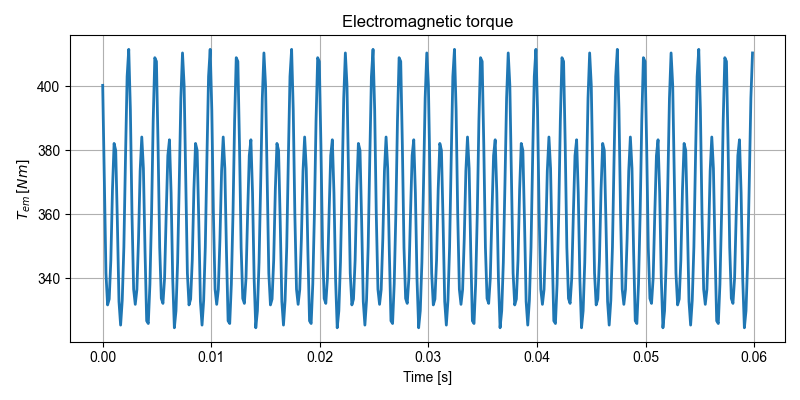

<IPython.core.display.Javascript object>


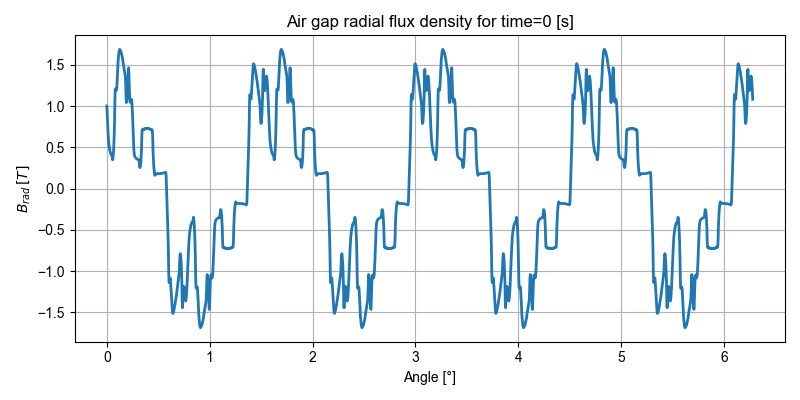

<IPython.core.display.Javascript object>


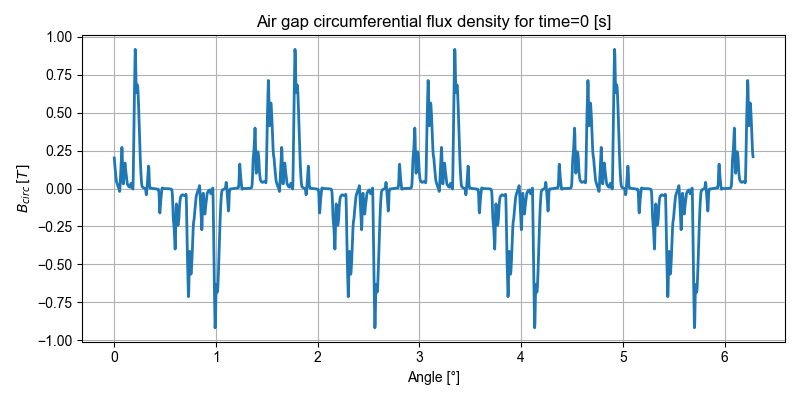

In [3]:
%matplotlib notebook
#------------------------------------------------------
# Plot the torque as a function of time
out.mag.Tem.plot_2D_Data("time")
out.mag.B.plot_2D_Data("angle")
#------------------------------------------------------

The plot command requires the **axis** of the field along which to plot ("*angle*" for instance). Titles and legends are automatically generated. The commands work with **any field computed in Pyleecan** (and stored in a SciDataTool object).

The syntax for the axes is specific to `SciDataTool` objects, and will be detailed in this tutorial.

There are two main plot commands in `SciDataTool`, which can apply to any **DataTime**, **DataFreq** or **VectorField** object from `SciDataTool`:

- `plot_2D_Data`: field as a function of one dimension (time, angle, freqs, wavenumber, phase
- `plot_3D_Data`: field as a function of two dimensions

`SciDataTool` also provides generic plot functions, which can be useful to easily format other plots, or plots of data which is not stored in a `SciDataTool` object:

- `plot_2D`: plot as a function of one dimension (curve, bargraph, barchart, quiver, curve_point, point, barStackResultant)
- `plot_3D`: plot as a function of two dimensions (stem, surf, pcolor, scatter)
- `plot_4D`: plot as a function of three dimensions (scatter)

To use one of these plot functions, simply import it such as:

In [4]:
from SciDataTool.Functions.Plot.plot_2D import plot_2D

We invite you to visit [SciDataTool repository on GitHub](https://github.com/Eomys/SciDataTool/tree/master/SciDataTool/Functions/Plot) for more details.

Fonts and colors can be automatically defined from the config_dict, using `dict_2D` or `dict_3D`:

In [5]:
from pyleecan.Functions.Plot import dict_2D, dict_3D

## 1. How to plot only one period/antiperiod
To plot only one period or anti-period:

<IPython.core.display.Javascript object>


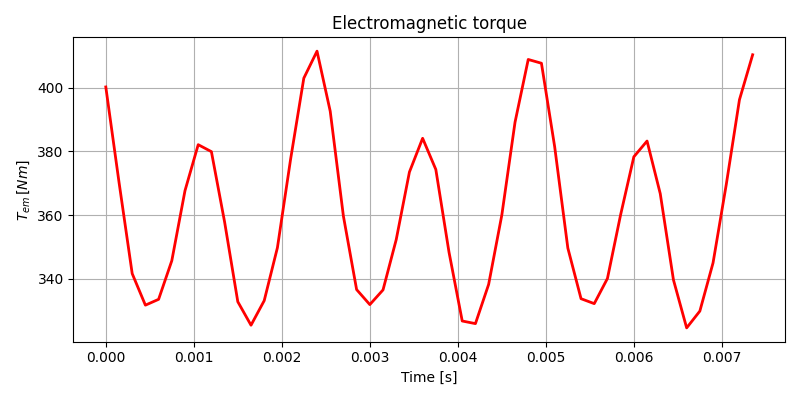

In [6]:
#---------------------------------------------------------------
# Plot the torque along the smallest period of time
out.mag.Tem.plot_2D_Data("time[smallestperiod]", **dict_2D)
#---------------------------------------------------------------

## 2. How to plot VectorField objects
For `VectorField` objects, such as `mag.B` or `force.AGSF`, a plot for each component will be created:

<IPython.core.display.Javascript object>


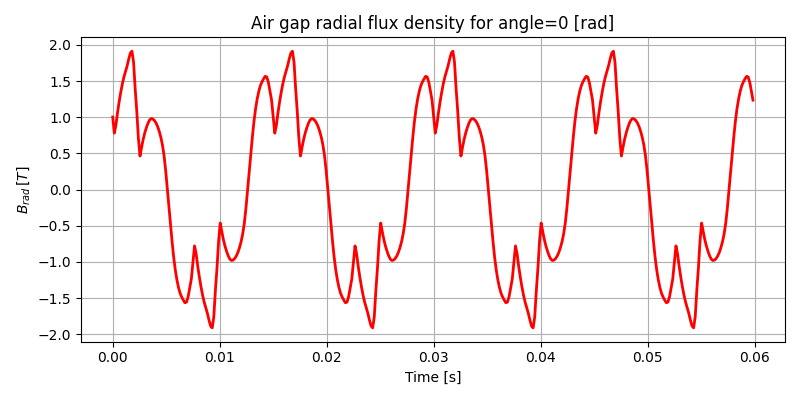

<IPython.core.display.Javascript object>


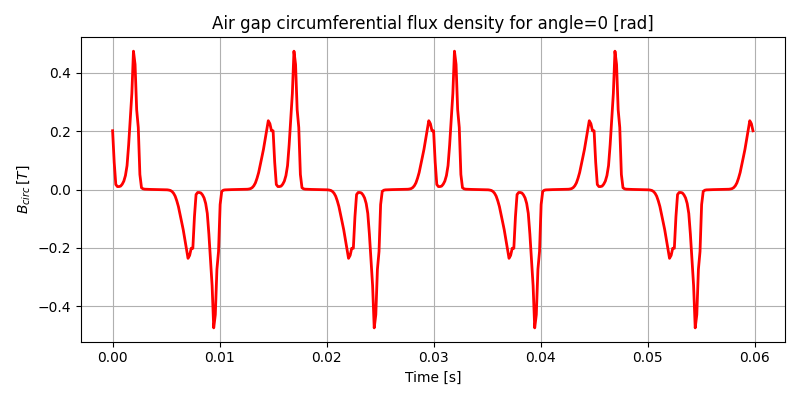

In [7]:
#---------------------------------------------------------------
# Plot all components of flux density
out.mag.B.plot_2D_Data("time", **dict_2D)
#---------------------------------------------------------------

To plot only one or several specific components, one can use the `component_list` parameter:

<IPython.core.display.Javascript object>


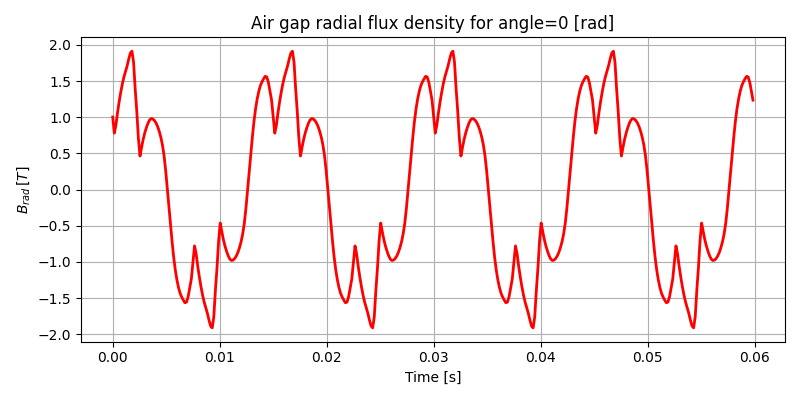

In [8]:
#---------------------------------------------------------------
# Plot only radial flux density
out.mag.B.plot_2D_Data("time", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

## 3. How to plot slices

In the previous plots, the flux density was sliced at `angle=0` (slice by default), but we could want to slice at another angle:

<IPython.core.display.Javascript object>


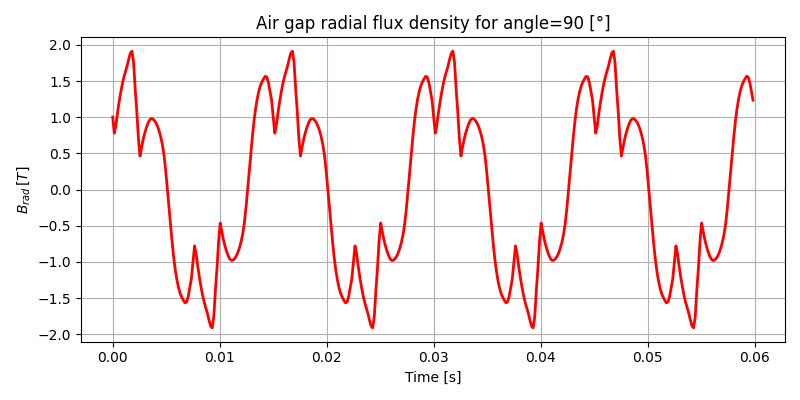

In [9]:
#---------------------------------------------------------------
# Plot for angle = 90°
out.mag.B.plot_2D_Data("time", "angle=90{°}", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

We can even superimpose several slices:

<IPython.core.display.Javascript object>


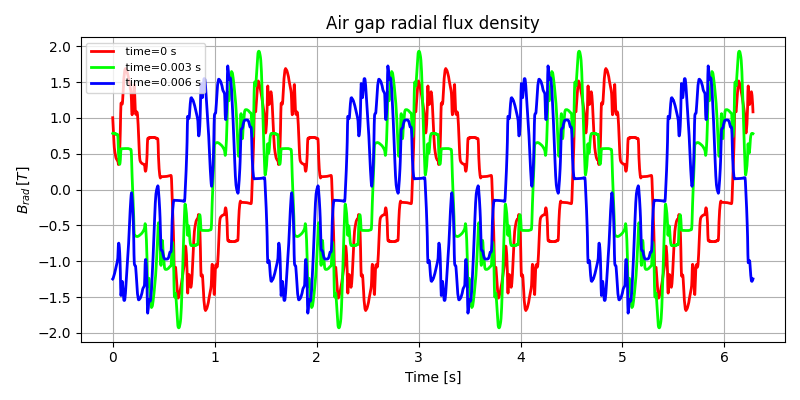

In [10]:
#---------------------------------------------------------------
# Plot for 3 slices of time
out.mag.B.plot_2D_Data("angle", "time[0,20,40]", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

## 4. How to plot spectra

One of the main interest of `SciDataTool` is to hide the complexity of Fourier Transforms. From a field defined in the time/space domain, you can directly plot its spectrum (note that intervals can be easily specified):

<IPython.core.display.Javascript object>


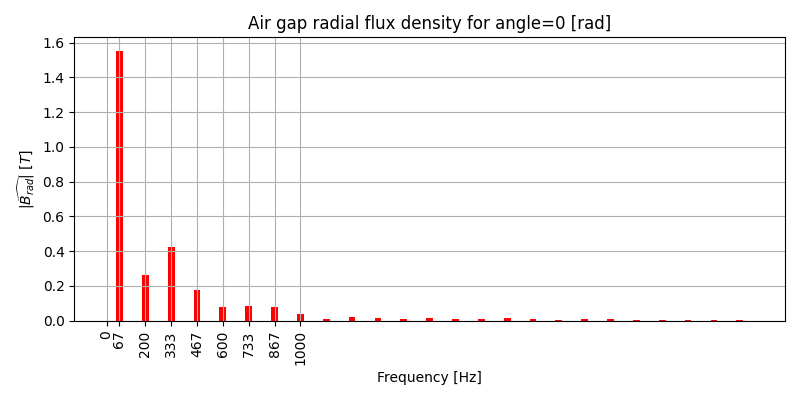

<IPython.core.display.Javascript object>


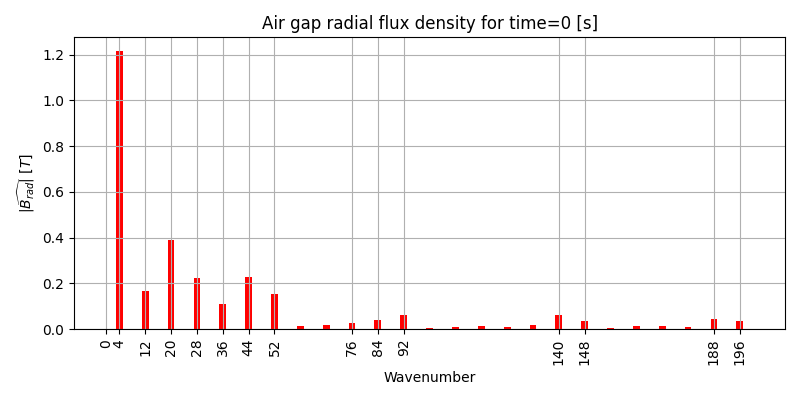

In [11]:
#---------------------------------------------------------------
# Plot time fft
out.mag.B.plot_2D_Data("freqs", component_list=["radial"], **dict_2D)
# Plot space fft
out.mag.B.plot_2D_Data("wavenumber=[0,200]", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

The main frequencies/wavenumbers are automatically labelled. This can be deactivated using `is_auto_ticks=False`:

<IPython.core.display.Javascript object>


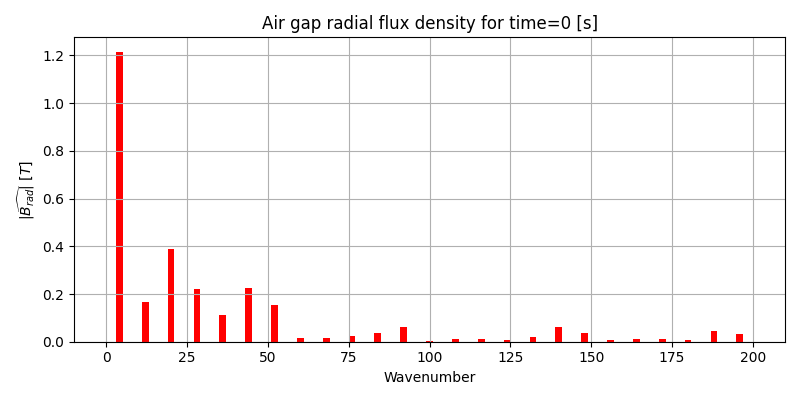

In [12]:
##---------------------------------------------------------------
# Deactivate automatic ticks
out.mag.B.plot_2D_Data("wavenumber=[0,200]", is_auto_ticks=False, component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

## 5. How to convert or normalize data

Another interesting feature of `pyleecan` is the conversion feature: there are built-in methods to convert units, and normalize fields and axes.

For example, we can plot the fft in electrical orders:

<IPython.core.display.Javascript object>


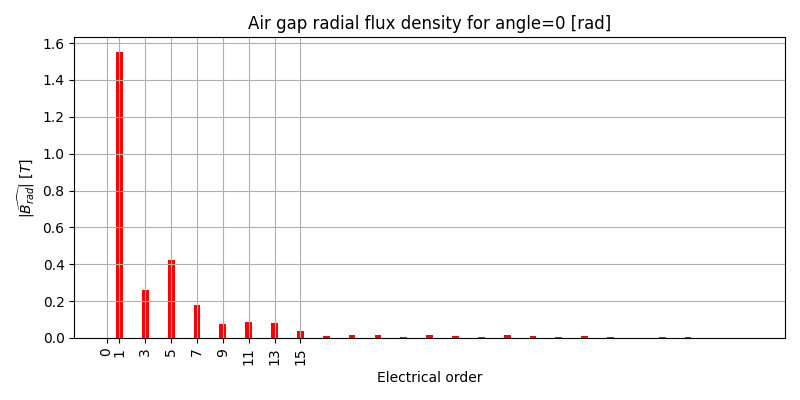

In [13]:
#---------------------------------------------------------------
# Normalize frequency axis
out.mag.B.plot_2D_Data("freqs->elec_order", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

In the following example, we will convert the stator winding flux from Webers into Maxwells ($1$ Wb = $10^8$ Mx):

<IPython.core.display.Javascript object>


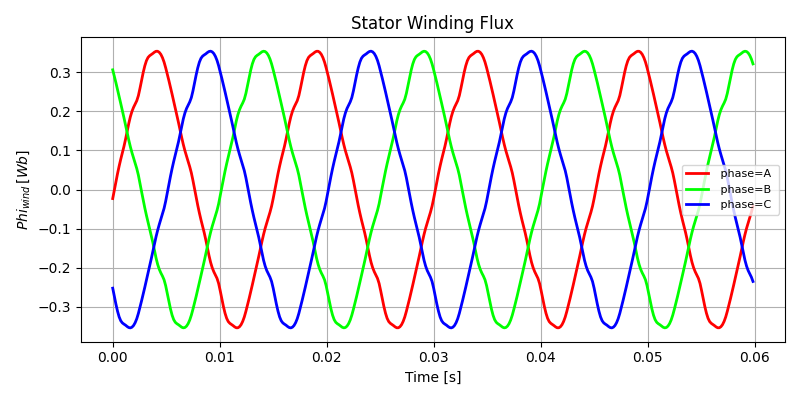

In [14]:
#---------------------------------------------------------------
# Original plot
out.mag.Phi_wind_stator.plot_2D_Data("time", "phase[]", **dict_2D)
#---------------------------------------------------------------

<IPython.core.display.Javascript object>


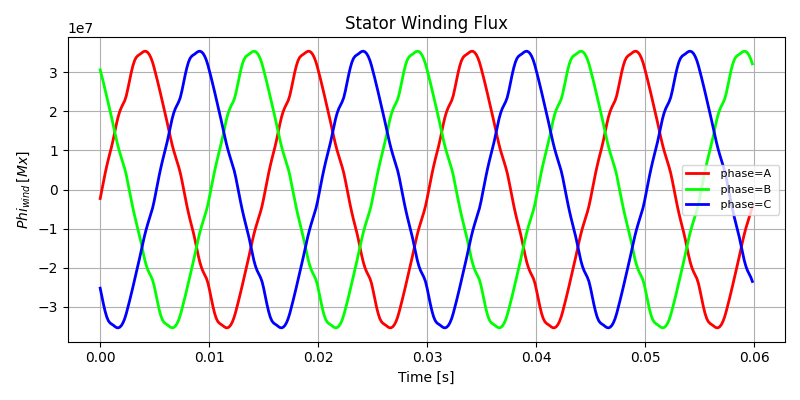

In [15]:
#---------------------------------------------------------------
# Conversion into Maxwells
out.mag.Phi_wind_stator.plot_2D_Data("time", "phase[]", unit="Mx", **dict_2D)
#---------------------------------------------------------------

In this last example, we will convert the angle axis into degrees and for the air-gap flux density from Teslas into Gauss ($1$ T= $10^4$ G)

<IPython.core.display.Javascript object>


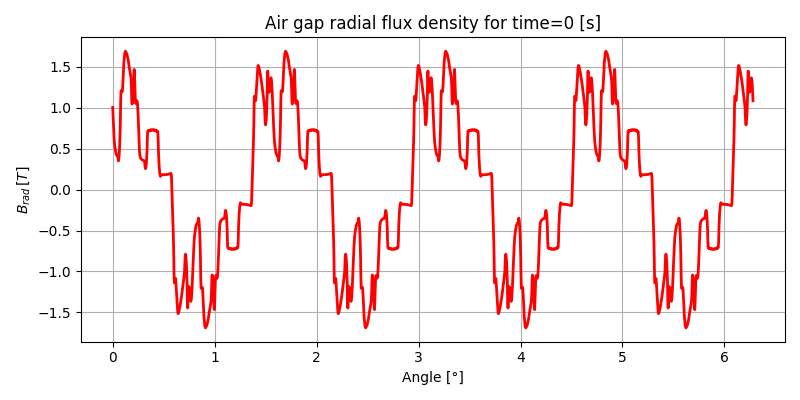

In [16]:
#---------------------------------------------------------------
# Original plot
out.mag.B.plot_2D_Data("angle", component_list=["radial"], **dict_2D)
#---------------------------------------------------------------

<IPython.core.display.Javascript object>


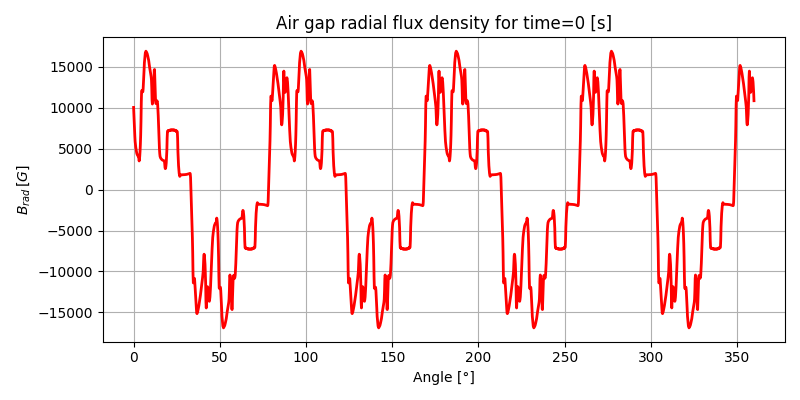

In [17]:
#---------------------------------------------------------------
# Original plot
out.mag.B.plot_2D_Data("angle{°}", component_list=["radial"], unit="G", **dict_2D)
#---------------------------------------------------------------

## 7) How to compare data

`pyleecan` also allows to easily compare several fields, even if they are defined on different discretizations. To do so, plot commands have a `data_list` parameter.

In the following example, we compare the flux density from the reference simulation, and from the open-circuit one:

<IPython.core.display.Javascript object>


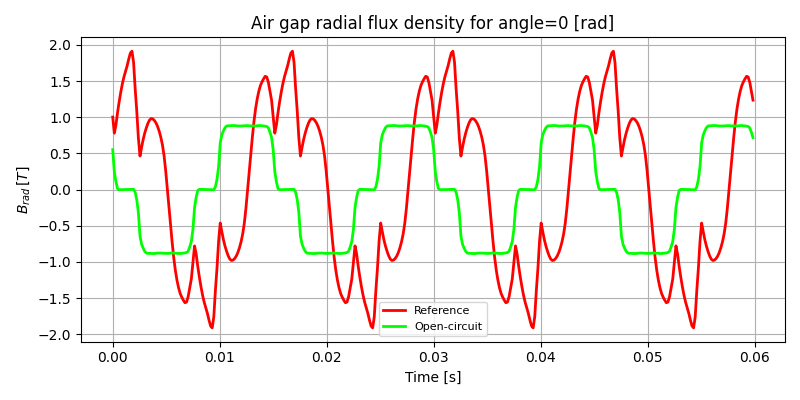

In [18]:
#---------------------------------------------------------------
# compare simu and simu2
out.mag.B.plot_2D_Data(
    "time", component_list=["radial"], data_list=[out2.mag.B], legend_list=["Reference", "Open-circuit"], **dict_2D
)
#---------------------------------------------------------------

We can also compare spectra:

<IPython.core.display.Javascript object>


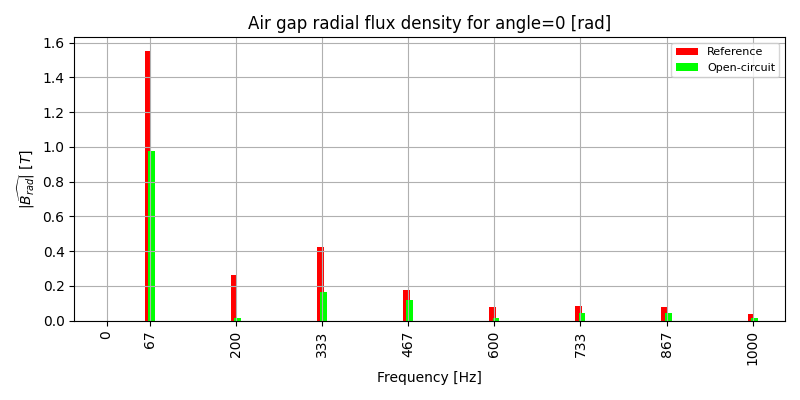

In [19]:
#---------------------------------------------------------------
# compare simu and simu2
out.mag.B.plot_2D_Data(
    "freqs<1000", component_list=["radial"], data_list=[out2.mag.B], legend_list=["Reference", "Open-circuit"], **dict_2D
)
#---------------------------------------------------------------

## 8) 3D plots

3D plots (for data defined on at least two axes) can also be created using the `plot_3D_Data` command:

<IPython.core.display.Javascript object>


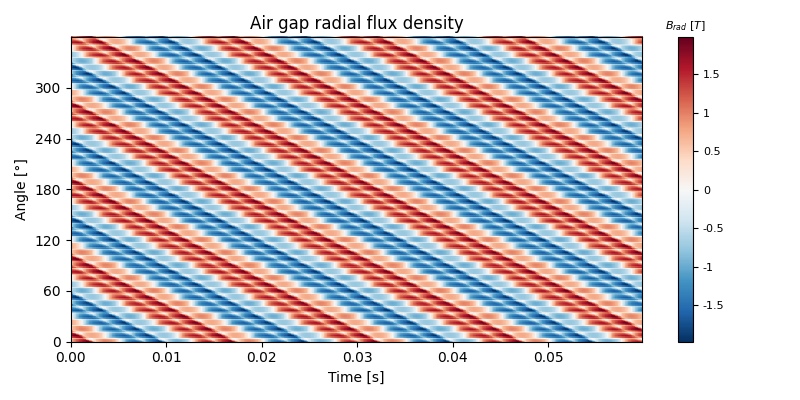

In [20]:
#---------------------------------------------------------------
# 3D surface plot
out.mag.B.plot_3D_Data("time", "angle{°}", component_list=["radial"], **dict_3D)
#---------------------------------------------------------------

To visualize this surface from above, use `is_2D_view`:

c:\python38\lib\site-packages\SciDataTool\Functions\Plot\init_fig.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = subplots(tight_layout=True, figsize=(8, 4))


<IPython.core.display.Javascript object>


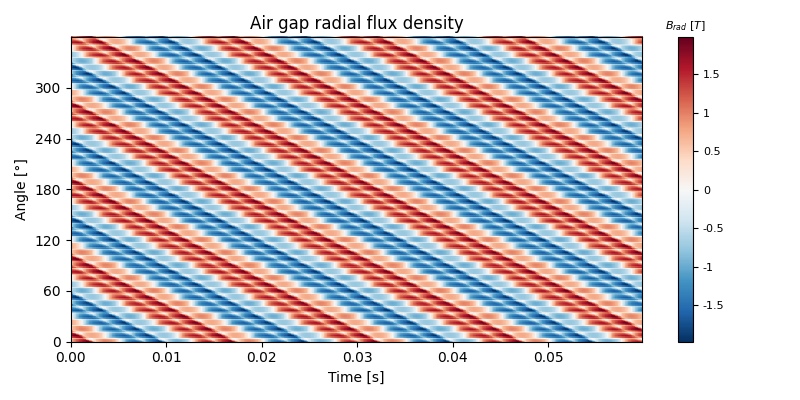

In [21]:
#---------------------------------------------------------------
# 2D surface plot
out.mag.B.plot_3D_Data("time", "angle{°}", component_list=["radial"], is_2D_view=True, **dict_3D)
#---------------------------------------------------------------

The field is automatically reconstructed using the periodicities specified in the simulation. It is always possible to plot a single period:

<IPython.core.display.Javascript object>


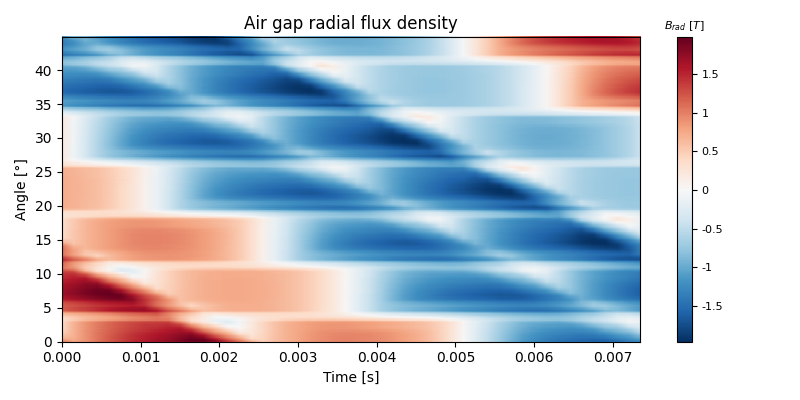

In [22]:
#---------------------------------------------------------------
# 2D surface plot over one period
out.mag.B.plot_3D_Data("time[smallestperiod]", "angle[smallestperiod]{°}", component_list=["radial"], is_2D_view=True, **dict_3D)
#---------------------------------------------------------------

2D Fourier Transforms also rely on `plot_3D_Data` command:

<IPython.core.display.Javascript object>


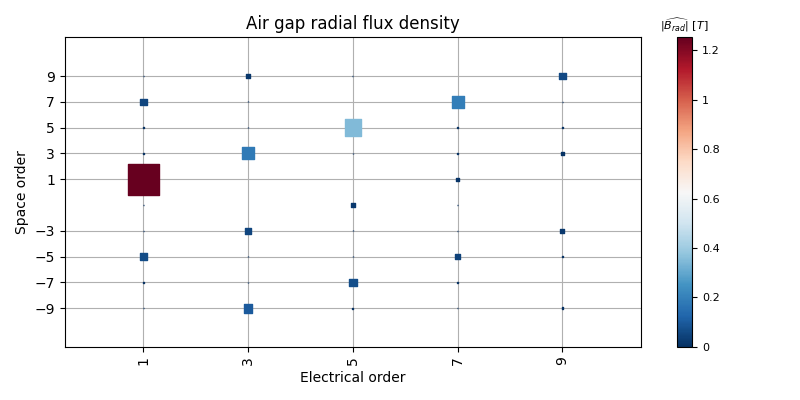

In [23]:
#---------------------------------------------------------------
# 3D stem plot of 2D fft
out.mag.B.plot_3D_Data(
    "freqs->elec_order=[0,10]", "wavenumber->space_order=[-10,10]", N_stem=50, component_list=["radial"], **dict_3D
)
#---------------------------------------------------------------

It can also be viewed in 2D:

<IPython.core.display.Javascript object>


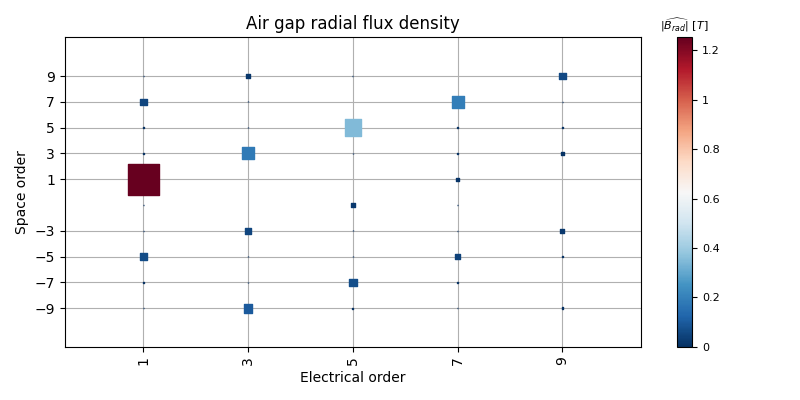

In [24]:
#---------------------------------------------------------------
# 2D plot of 2D fft
out.mag.B.plot_3D_Data(
    "freqs->elec_order=[0,10]",
    "wavenumber->space_order=[-10,10]",
    N_stem=50,
    component_list=["radial"],
    is_2D_view=True,
    **dict_3D
)
#---------------------------------------------------------------

Many plots were made using the magnetic flux density, but they are of course applicable to any 2D output data, like the force computed using the airgap surface force:

<IPython.core.display.Javascript object>


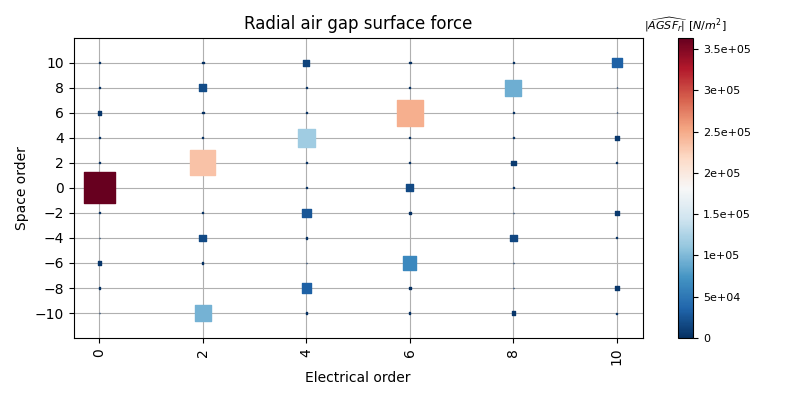

In [25]:
#---------------------------------------------------------------
# 2D fft of airgap surface force
out.force.AGSF.plot_3D_Data(
    "freqs->elec_order=[0,10]",
    "wavenumber->space_order=[-10,10]",
    N_stem=50,
    component_list=["radial"],
    is_2D_view=True,
    **dict_3D
)
#---------------------------------------------------------------